# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

# Uploading the Dataset

In [2]:
print("🔹 Please upload your dataset CSV file:")
uploaded = files.upload()

🔹 Please upload your dataset CSV file:


Saving creditcard.csv to creditcard.csv


In [3]:
filename = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(filename)

In [4]:
print("\n🔹 First 5 Rows of Dataset:")
print(df.head())


🔹 First 5 Rows of Dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

In [5]:
print("\n🔹 Data Cleaning in Progress...")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values (removes rows if more than 50% NaN)
df.dropna(thresh=len(df.columns) * 0.5, inplace=True)

# Fill remaining missing values with median (better for outlier-heavy data)
df.fillna(df.median(), inplace=True)

# Drop 'Time' column if exists (not useful for fraud detection)
df.drop(columns=['Time'], errors='ignore', inplace=True)

print("✅ Data Cleaning Done! Shape of Cleaned Data:", df.shape)



🔹 Data Cleaning in Progress...
✅ Data Cleaning Done! Shape of Cleaned Data: (283726, 30)


In [6]:
print("\n🔹 First 5 Rows of Cleaned Dataset:")
print(df.head())


🔹 First 5 Rows of Cleaned Dataset:
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [8]:
print("\n🔹 Class Distribution (Fraud vs Non-Fraud):\n", df['Class'].value_counts())


🔹 Class Distribution (Fraud vs Non-Fraud):
 Class
0    283253
1       473
Name: count, dtype: int64


In [7]:
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature Scaling

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train ML Mode

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔹 Accuracy Score:", accuracy_score(y_test, y_pred))


🔹 Confusion Matrix:
 [[84971     5]
 [   33   109]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.77      0.85       142

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.93     85118
weighted avg       1.00      1.00      1.00     85118


🔹 Accuracy Score: 0.9995535609389319


# Visualization

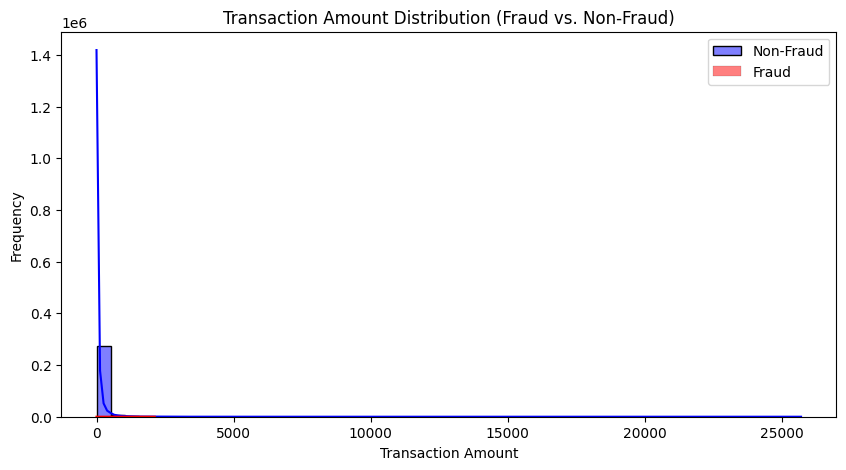

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, label='Non-Fraud', color='blue', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, label='Fraud', color='red', kde=True)
plt.legend()
plt.title("Transaction Amount Distribution (Fraud vs. Non-Fraud)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import time

In [16]:
pca = PCA(n_components=15)  # Reduce to 15 principal components
X_pca = pca.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Anomaly Detection Models

In [20]:
print("\n🔹 Anomaly Detection Using Isolation Forest & LOF...")
iso_forest = IsolationForest(contamination=0.01, random_state=42)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

iso_forest.fit(X_train)
lof.fit(X_train)

anomaly_scores_iso = iso_forest.decision_function(X_test)
anomaly_scores_lof = lof.negative_outlier_factor_

print("✅ Anomaly Detection Done!")


🔹 Anomaly Detection Using Isolation Forest & LOF...


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


✅ Anomaly Detection Done!


# Train ML Models (Logistic Regression, Decision Tree, Neural Network)

In [21]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"✅ {name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))



🔹 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.9990
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.79      0.54      0.64       142

    accuracy                           1.00     85118
   macro avg       0.90      0.77      0.82     85118
weighted avg       1.00      1.00      1.00     85118


🔹 Training Decision Tree...
✅ Decision Tree Accuracy: 0.9992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.78      0.70      0.74       142

    accuracy                           1.00     85118
   macro avg       0.89      0.85      0.87     85118
weighted avg       1.00      1.00      1.00     85118


🔹 Training Neural Network...
✅ Neural Network Accuracy: 0.9994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.88      0.75    

# Real-time Monitoring Simulation

In [22]:
print("\n🔹 Simulating Real-time Fraud Detection...")
start_time = time.time()
for i in range(5):  # Simulate 5 transactions
    sample = X_test[i].reshape(1, -1)
    prediction = models["Logistic Regression"].predict(sample)
    print(f"Transaction {i+1}: {'Fraud' if prediction[0] == 1 else 'Legit'}")
end_time = time.time()
print(f"✅ Real-time Detection Speed: {end_time - start_time:.4f} sec per transaction")


🔹 Simulating Real-time Fraud Detection...
Transaction 1: Legit
Transaction 2: Legit
Transaction 3: Legit
Transaction 4: Legit
Transaction 5: Legit
✅ Real-time Detection Speed: 0.0022 sec per transaction


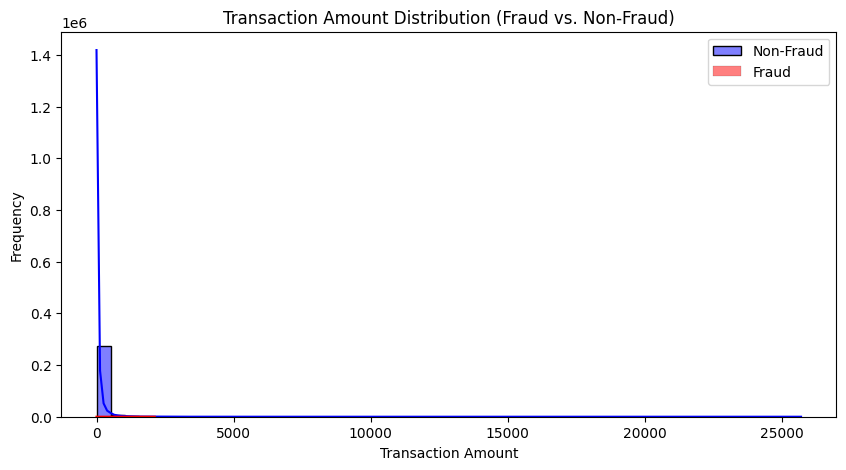

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, label='Non-Fraud', color='blue', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, label='Fraud', color='red', kde=True)
plt.legend()
plt.title("Transaction Amount Distribution (Fraud vs. Non-Fraud)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()